In [2]:
%load_ext autoreload
%autoreload 2

In [3]:

import os
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from  matplotlib.patches import Polygon
from IPython.display import Image
import imageio.v2
import csv

import tqdm as tqdm
import jax 
jax.config.update('jax_platform_name', 'cpu')
jax.config.update("jax_debug_nans", False)

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

from iLQR import iLQR, Path



In [4]:
def load_path(filepath: str):
    """
    Gets the centerline of the track from the trajectory data. We currently only
    support 2D track.

    Args:
        filepath (str): the path to file consisting of the centerline position.

    Returns:
        np.ndarray: centerline, of the shape (2, N).
    """
    x = []
    y = []
    with open(filepath) as f:
        spamreader = csv.reader(f, delimiter=',')
        for i, row in enumerate(spamreader):
            if i > 0:
                x.append(float(row[0]))
                y.append(float(row[1]))

    return np.array([x, y])

In [49]:
jax.config.update('jax_platform_name', 'cpu')

centerline = load_path('outerloop_center_smooth.csv')
path = Path(centerline, 0.6, 0.6, loop=True)
config_file = '/hdd/Git_Repo/PrincetonRaceCar/ROS_Core/src/Planning/ilqr_planning_ros/configs/ilqr.yaml'
solver = iLQR()#config_file)
# # make some obstacles
# obs1 = np.array([[-1, -1, -0, -0], [5.2, 6.0, 6.0, 5.2]]).T
obs1 = np.array([[-1, -1, -0.5, -0.5], [5.2, 5.9, 5.9, 5.2]]).T
obs2 = np.array([[1, 1, 1.5, 1.5], [-0.2, 0.5, 0.5, -0.2]]).T
obs_list = [[obs1 for _ in range(10)]]#, [obs2 for _ in range(10)]]
solver.update_obstacles(obs_list)
solver.update_path(path)

set up time: 2.485863447189331
forward time:  0.003022432327270508 0.0025925636291503906 0.006754398345947266
Update from  14.023736  to  9.95394 reg:  1.0 alpha: 1.000 12.341
forward time:  0.0018339157104492188 0.0017824172973632812 0.0020792484283447266
Update from  9.95394  to  9.613319 reg:  0.2 alpha: 1.000 12.352
forward time:  0.001636505126953125 0.0017108917236328125 0.0019960403442382812
forward time:  0.0014944076538085938 0.0016274452209472656 0.001972675323486328
forward time:  0.0013980865478515625 0.0016465187072753906 0.0019252300262451172
forward time:  0.0014657974243164062 0.0016393661499023438 0.001796722412109375
forward time:  0.0014657974243164062 0.0015423297882080078 0.0018854141235351562
forward time:  0.0013647079467773438 0.0015404224395751953 0.0018513202667236328
forward time:  0.0015630722045898438 0.0017952919006347656 0.0019445419311523438
forward time:  0.0016064643859863281 0.0016016960144042969 0.0018548965454101562
forward time:  0.0015072822570800

get np: 0.0006849765777587891
get refs: 0.005290031433105469
get obsrefs: 0.002689361572265625
set up time: 0.014844894409179688
get np: 0.00012540817260742188
get refs: 0.0036945343017578125
get obsrefs: 0.0013225078582763672
Update from  208.2487  to  205.0842 reg:  15625.0 alpha: 1.000 0.030
get np: 6.651878356933594e-05
get refs: 0.0034759044647216797
get obsrefs: 0.0012018680572509766
Update from  205.0842  to  203.35378 reg:  15625.0 alpha: 1.000 0.039
get np: 5.7220458984375e-05
get refs: 0.003422260284423828
get obsrefs: 0.0011556148529052734
Update from  203.35378  to  201.69359 reg:  15625.0 alpha: 1.000 0.046
get np: 7.653236389160156e-05
get refs: 0.003423452377319336
get obsrefs: 0.0011591911315917969
Update from  201.69359  to  198.62488 reg:  15625.0 alpha: 1.000 0.053
get np: 5.4836273193359375e-05
get refs: 0.003381967544555664
get obsrefs: 0.0011751651763916016
Update from  198.62488  to  188.99722 reg:  15625.0 alpha: 1.000 0.061
get np: 5.602836608886719e-05
get ref

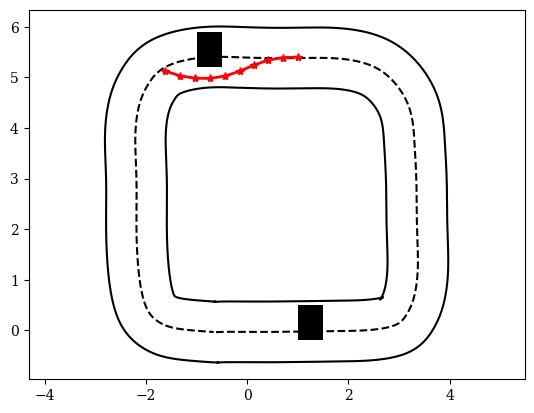

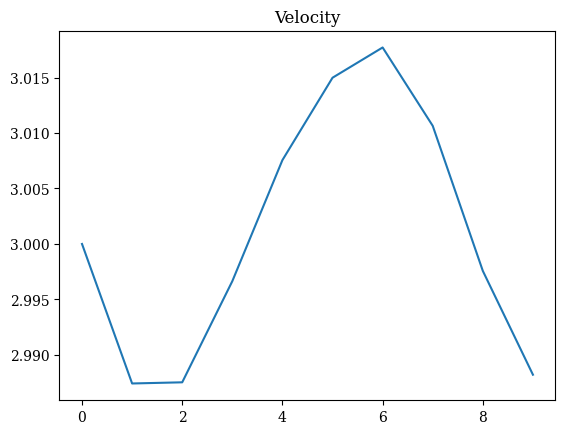

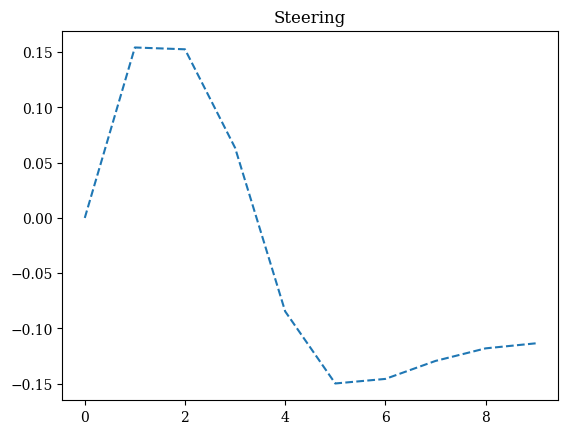

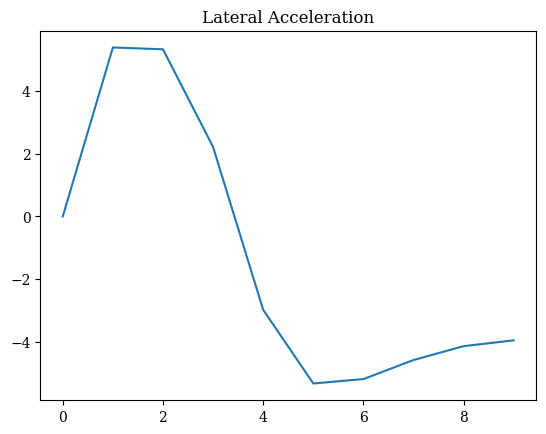

In [56]:
# solver.update_obstacles(obs_list)

x_cur = np.array([1, 5.4, 3, 3.14, 0])
plan = solver.plan(x_cur)

path.plot_track()
path.plot_track_center()
plt.plot(plan['states'][0, :], plan['states'][1, :], 'r-*', linewidth=2)

p = Polygon(obs1, facecolor = 'k')
plt.gca().add_patch(p)
plt.axis('equal')

p = Polygon(obs2, facecolor = 'k')
plt.gca().add_patch(p)
plt.axis('equal')

print(plan['status'])

plt.figure()
a = plan['states'][2, :] 
plt.plot(a)
plt.title('Velocity')

plt.figure()
# plt.plot(plan['controls'][0,:])
plt.plot(plan['states'][-1,:], '--')
plt.title('Steering')

plt.figure()
a = plan['states'][2, :]**2 / 0.257 * np.tan(plan['states'][-1, :])
plt.plot(a)
plt.title('Lateral Acceleration')

print(plan['t_process'])


In [ ]:
x_cur = np.array([0., 0., 2., 0., 0.])  # Initial state.

# Load ILQR
centerline = load_path('outerloop_center_smooth.csv')
path = Path(centerline, 0.6, 0.6, loop=True)

config_file = '/hdd/Git_Repo/PrincetonRaceCar/ROS_Core/src/Planning/ilqr_planning_ros/configs/ilqr.yaml'
solver = iLQR() #(config_file)
solver.update_path(path)

obs1 = np.array([[-1, -1, -0.5, -0.5], [5.3, 5.8, 5.8, 5.3]]).T
obs2 = np.array([[1, 1.25, 1.5, 1.5, 1.25, 1], [5.8, 5.4, 5.8 , 6.0, 6.2, 6.0]]).T
obs3 = np.array([[2.5, 2.5, 2, 2], [-0, 0.5, 0.5, -0]]).T
# obs4 = np.array([[-200, -200, -1.5, -1.5], [0.5, 1, 1, 0.5]]).T
obs_list = [[obs1 for _ in range(10)], 
            [obs2 for _ in range(10)],
            [obs3 for _ in range(10)]]
            # [obs4 for _ in range(10)]]
solver.update_obstacles(obs_list)

# define some parameters
n = 10
itr_receding = 100
init_control = np.zeros((2, n))
fig_prog_folder = 'fig/'
! mkdir -p $fig_prog_folder

state_history = np.zeros((5,itr_receding))
t_process = np.zeros(itr_receding)
for i in (pbar := tqdm.tqdm(range(itr_receding))):
    
    plan = solver.plan(x_cur, init_control)
    states = plan['states']
    controls = plan['controls']
    x_cur = states[:,1]
    state_history[:,i]  = x_cur
    init_control[:,:-1] = controls[:,1:]
    pbar.set_description(f"iLQR takes : {plan['t_process']:.2f} sec']")
    t_process[i] = plan['t_process']
    # plot
    plt.clf()
    path.plot_track()
    p = Polygon(obs1, facecolor = 'k')
    plt.gca().add_patch(p)

    p = Polygon(obs2, facecolor = 'k')
    plt.gca().add_patch(p)

    p = Polygon(obs3, facecolor = 'k')
    plt.gca().add_patch(p)

    # p = Polygon(obs4, facecolor = 'k')
    # plt.gca().add_patch(p)
    
    sc = plt.scatter(
        state_history[0, :i], state_history[1, :i], s=24,
        c=state_history[2, :i], cmap=cm.jet, vmin=0, vmax=5,
        edgecolor='none', marker='o'
    )
    cbar = plt.colorbar(sc)
    cbar.set_label(r"velocity [$m/s$]", size=20)
    
    plt.plot(states[0, :], states[1, :], 'r', linewidth=2)
    plt.axis('equal')
    plt.savefig(os.path.join(fig_prog_folder, str(i)+".png"), dpi=200)
plt.close('All')

gif_path = os.path.join(fig_prog_folder, 'rollout.gif')
with imageio.get_writer(gif_path, mode='I') as writer:
    for i in range(itr_receding):
        filename = os.path.join(fig_prog_folder, str(i)+".png")
        image = imageio.imread(filename)
        writer.append_data(image)

plt.figure()
plt.plot(state_history[2,:])
plt.title('Velocity')


plt.figure()
a = state_history[2, :]**2 / 0.257 * np.tan(state_history[-1, :])
plt.plot(a)

plt.figure()
plt.plot(t_process)



In [ ]:
a = np.random.randn(2,20)
b = np.zeros_like(a)

i=7
b[:,:(20-i)] = a[:,i:]
b